<a href="https://colab.research.google.com/github/hatimdeve/python/blob/main/Handle_Missing_Values3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arbitrary Value Imputation**

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from google.colab import files
import io
uploaded =files.upload()


Saving titanic.csv to titanic.csv


In [2]:
df=pd.read_csv(io.BytesIO(uploaded['titanic.csv']),usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

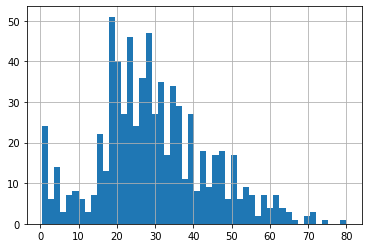

In [4]:
df['Age'].hist(bins=50)

**Advantages**
* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages**

* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

**How To Handle Categroical Missing Values**

*Frequent Category Imputation*

In [5]:
uploaded =files.upload()

Saving housepricing.csv to housepricing.csv


In [8]:
df=pd.read_csv('housepricing.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

**Compute the frequency with every feature**

In [10]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

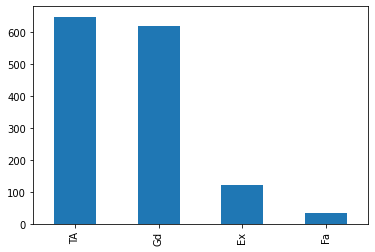

In [12]:
df['BsmtQual'].value_counts().plot.bar()

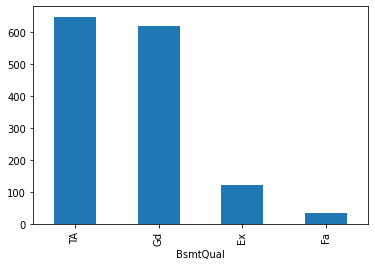

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

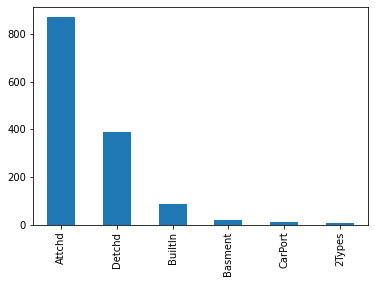

In [13]:
df['GarageType'].value_counts().plot.bar()

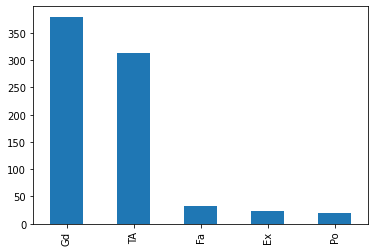

In [14]:
df['FireplaceQu'].value_counts().plot.bar()

In [15]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [19]:
df['GarageType'].mode()[0]

'Attchd'

In [16]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [17]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

**Advantages**

* Easy To implement
* Fater way to implement

**Disadvantages**

* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

In [20]:
df=pd.read_csv('housepricing.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [25]:
frequent=df['BsmtQual'].mode()[0]
frequent

'TA'

In [26]:
df['BsmtQual'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [27]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


**Suppose if you have more frequent categories, we just replace NAN with a new category**

In [29]:
df=pd.read_csv('housepricing.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [30]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [31]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [32]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
